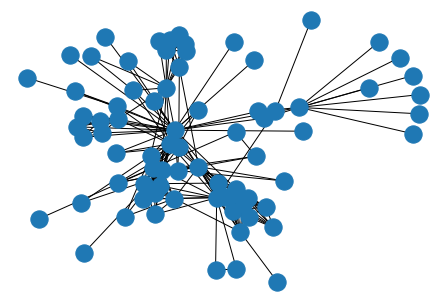

In [1]:
# Create a graph
import networkx as nx
G = nx.les_miserables_graph()

# Visualize the graph, for fun
import matplotlib.pyplot as plt
nx.draw(G)

In [2]:
import gurobipy as gp
from gurobipy import GRB

# find a maximum k-plex, for 
k = 3

n = G.number_of_nodes()

In [3]:
# Create model object
m = gp.Model()

# Create variable for each node
x = m.addVars( G.nodes, vtype=GRB.BINARY )

# For sparsity reasons, add variable z = x(V).
z = m.addVar()
m.addConstr( z == gp.quicksum( x[i] for i in G.nodes ) )

# Objective function: maximize number of nodes
m.setObjective( z, GRB.MAXIMIZE )

# Add constraint for each node
m.addConstrs( ( n - k )*( 1 - x[i] ) + gp.quicksum( x[j] for j in G.neighbors(i) ) >= z - k for i in G.nodes )

# Solve
m.optimize()

Academic license - for non-commercial use only - expires 2021-07-26
Using license file C:\Users\Austin\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 78 rows, 78 columns and 740 nonzeros
Model fingerprint: 0xbc3a5f39
Variable types: 1 continuous, 77 integer (77 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [8e+01, 8e+01]
Found heuristic solution: objective -0.0000000
Presolve time: 0.02s
Presolved: 78 rows, 78 columns, 740 nonzeros
Variable types: 0 continuous, 78 integer (77 binary)

Root relaxation: objective 4.120475e+01, 82 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   41.20475    0   78   -0.00000   41.20475      -   

In [4]:
print("Objective:",m.objVal)

selected_nodes = [ i for i in G.nodes if x[i].x > 0.5 ]

print("Selected nodes:", selected_nodes)

Objective: 12.0
Selected nodes: ['Gavroche', 'Marius', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire']


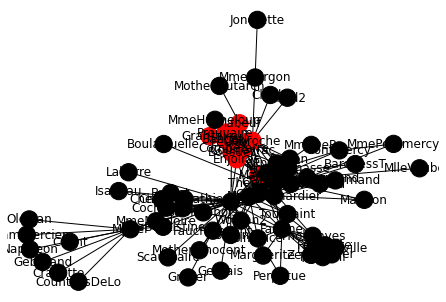

In [5]:
# Visualize the solution
node_colors = [ "red" if i in selected_nodes else "black" for i in G.nodes ]

nx.draw( G, with_labels=True, node_color=node_colors )

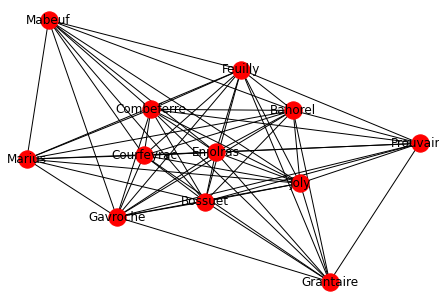

In [6]:
nx.draw( G.subgraph(selected_nodes), with_labels=True, node_color="red")